In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
!mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!ls /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1

ls: cannot access '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1': No such file or directory


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


In [ ]:

data_dir = '/kaggle/input/dogs-vs-cats/dogs_vs_cats'

In [ ]:
# prompt: give me path for tain & test data

import os

train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

print("Train data path:", train_dir)
print("Test data path:", test_dir)



Train data path: /kaggle/input/dogs-vs-cats/dogs_vs_cats/train
Test data path: /kaggle/input/dogs-vs-cats/dogs_vs_cats/test


In [ ]:
train_dir

'/kaggle/input/dogs-vs-cats/dogs_vs_cats/train'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout, Activation

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Use **Generators** to divide large dataset into chunks

In [ ]:
train_ds= keras.utils.image_dataset_from_directory(train_dir, batch_size=64, shuffle=True)

validation_ds = keras.utils.image_dataset_from_directory(test_dir)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
os.getcwd()

'/content'

In [ ]:
# normalize the images

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

train_ds = train_ds.map(normalize_img)
validation_ds = validation_ds.map(normalize_img)


## Create CNN Model

In [ ]:
model =Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds, epochs=10, batch_size=64, validation_data=validation_ds)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 144ms/step - accuracy: 0.6085 - loss: 0.6708 - val_accuracy: 0.7076 - val_loss: 0.5522
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 142ms/step - accuracy: 0.7523 - loss: 0.4993 - val_accuracy: 0.7930 - val_loss: 0.4454
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - accuracy: 0.8100 - loss: 0.4115 - val_accuracy: 0.8132 - val_loss: 0.4251
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - accuracy: 0.8612 - loss: 0.3162 - val_accuracy: 0.7974 - val_loss: 0.5169
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 135ms/step - accuracy: 0.9255 - loss: 0.1928 - val_accuracy: 0.7888 - val_loss: 0.6791
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 142ms/step - accuracy: 0.9561 - loss: 0.1193 - val_accuracy: 0.7942 - val_loss: 0.9303
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - accuracy: 0.9728 - loss: 0.0776 - val_accuracy: 0.7946 - val_loss: 1.0370
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.9822 - loss: 0

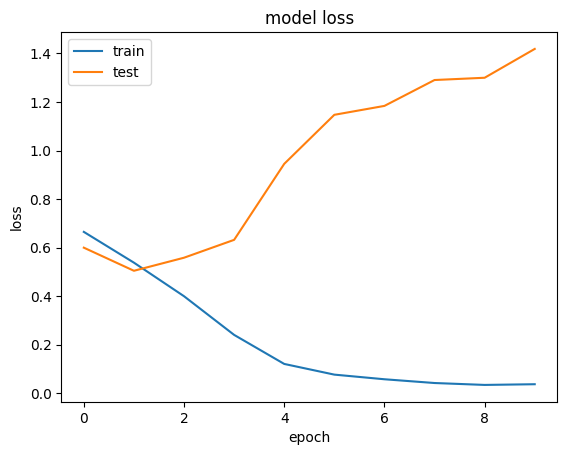

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

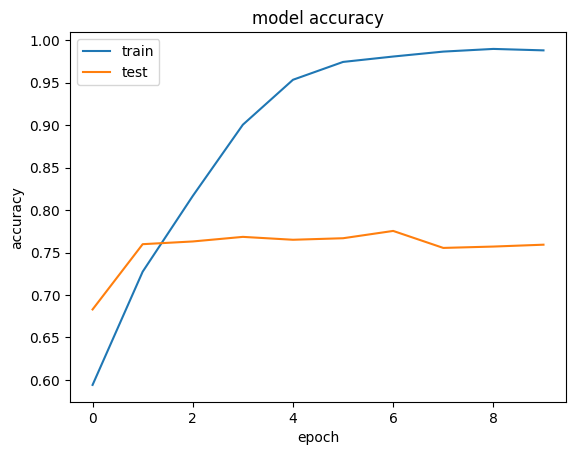

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 🔴OVERFITTING👆

#Reduce Overfitting

- Dropout
- Batch Normalization

In [ ]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(32, (3,3), input_shape=(256,256,3), kernel_regularizer=l2(0.01), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))  # Add dropout after conv layers

# Conv Block 2
model.add(Conv2D(64, (3,3), kernel_regularizer=l2(0.01), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

# Conv Block 3
model.add(Conv2D(128, (3,3), kernel_regularizer=l2(0.01), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

# Conv Block 4 (optional, for larger dataset)
model.add(Conv2D(256, (3,3), kernel_regularizer=l2(0.01), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

# Flatten
model.add(Flatten())

# Dense Layers
model.add(Dense(128, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Increase dropout

model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
history= model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 96ms/step - accuracy: 0.6016 - loss: 6.4508 - val_accuracy: 0.5052 - val_loss: 4.8932
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.6858 - loss: 3.6339 - val_accuracy: 0.5516 - val_loss: 2.8873
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.7298 - loss: 2.2260 - val_accuracy: 0.5908 - val_loss: 1.9853
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 94ms/step - accuracy: 0.7665 - loss: 1.5784 - val_accuracy: 0.7614 - val_loss: 1.3635
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 97ms/step - accuracy: 0.7963 - loss: 1.2640 - val_accuracy: 0.7930 - val_loss: 1.1388
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.8098 - loss: 1.0956 - val_accuracy: 0.6866 - val_loss: 1.3150
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 93ms/step - accuracy: 0.8188 - loss: 1.0079 - val_accuracy: 0.8000 - val_loss: 0.9713
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.8281 - loss: 0.9230 - 

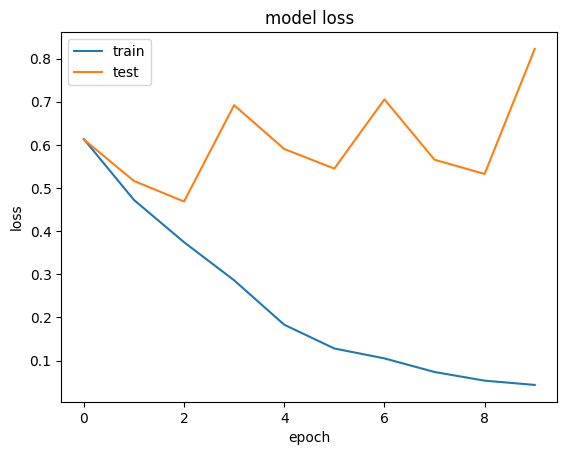

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

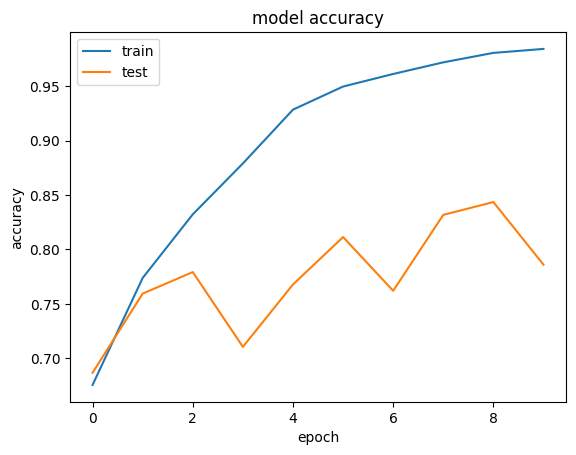

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction on unseen data

In [ ]:
import cv2

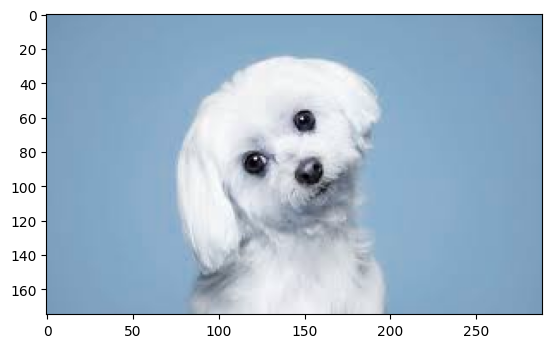

In [ ]:
test_img = cv2.imread(r"/kaggle/images.jfif")
plt.imshow(test_img)

In [ ]:
test_img.shape

(175, 289, 3)

In [ ]:
test_img= cv2.resize(test_img, (256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[1.]], dtype=float32)

## Prediction 2

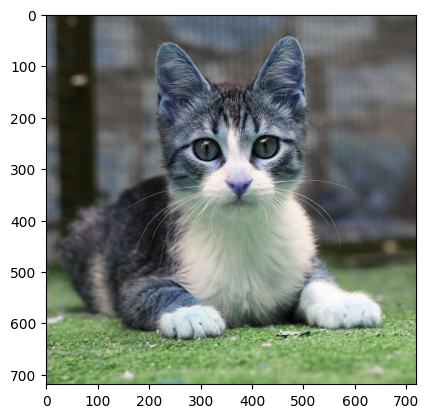

In [ ]:
test_img2 = cv2.imread('/kaggle/cut cat serhio 02-1813x1811-720x719.jpg')
plt.imshow(test_img2)

In [ ]:
test_img2= cv2.resize(test_img2, (256,256))


In [ ]:
#test_input2= test_img2.reshape((1,256,256,3))
test_input2 = tf.reshape(test_img2, (1, 256, 256, 3))

In [ ]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.]], dtype=float32)

# One More try to improve the accuracy

In [ ]:
model =Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',  # Lower learning rate
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds, epochs=10, batch_size=64, validation_data=validation_ds)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2849s 9s/step - accuracy: 0.5686 - loss: 0.6692 - val_accuracy: 0.7324 - val_loss: 0.5405
Epoch 2/10
 89/313 ━━━━━━━━━━━━━━━━━━━━ 31:22 8s/step - accuracy: 0.7094 - loss: 0.5577